In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Merging all files into one file

file_path = r'.\OneDrive\Documents\Python Scripts\SalesAnalysis\Sales_Data'
df = pd.DataFrame()
for file in os.listdir(file_path):
    df_temp = pd.read_csv(file_path+"\\"+file)
    df = pd.concat([df,df_temp],ignore_index=True)
df.to_csv('all_sales.csv', index=False)

In [3]:
# Drop Nan values 

all_data = pd.read_csv('all_sales.csv')
all_data = all_data.dropna(axis=0)
all_data = all_data.reset_index(drop=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


####  Q1: What was the best month for sales? How much was earned that month?

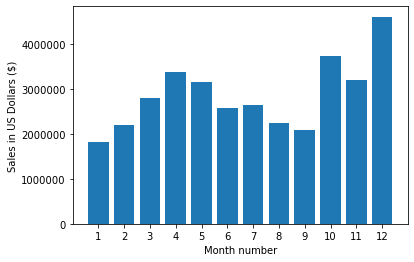

In [4]:
# Clean the data 

all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

# Extract Month from Order Date

all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

# Change the datatypes
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data['Price Each'] = all_data['Price Each'].astype('float64')

# Add sales column

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


result = all_data.groupby('Month').sum()
months = range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ticklabel_format(style='plain')
plt.xlabel('Month number')
plt.ylabel('Sales in US Dollars ($)')
plt.show()

#### Ans: Best month for sales was December earning more than 4 million.

#### Q2:  What city sold the most product?

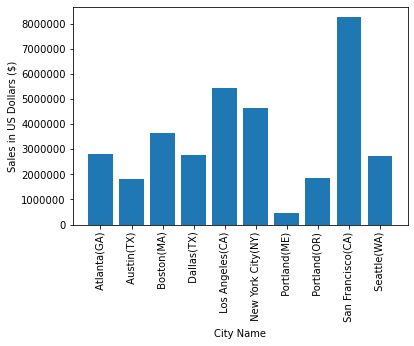

In [5]:
# Extract the city and state 

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + '(' + x.split(',')[2].split(' ')[1] + ')')

# Sum up the sales by city

result_city = all_data.groupby('City').sum()

cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities, result_city['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ticklabel_format(axis='y',style='plain')
plt.xlabel('City Name')
plt.ylabel('Sales in US Dollars ($)')
plt.show()

#### Ans: San Francisco (CA) sold the most products

#### Q3:  What time should we display advertisements to maximize the likelihood of customer’s buying product?

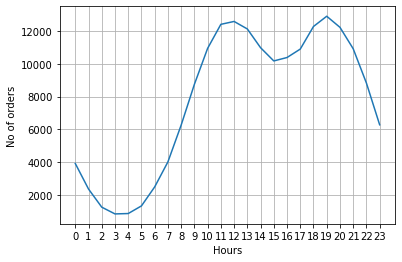

In [6]:
# Convert the column to datetime

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Extract hour

all_data['Hour'] = all_data['Order Date'].dt.hour

# Extract minute

all_data['Minute'] = all_data['Order Date'].dt.minute

hours = [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).size())
plt.xticks(hours)
plt.ticklabel_format(axis='y',style='plain')
plt.xlabel('Hours')
plt.ylabel('No of orders')
plt.grid()
plt.show()

#### Ans: The advertisments should be display around 11am in the morning and 7pm in the evening.

#### Q4: What products are most often sold together?

In [7]:
# Group the items that were sold together and get the count of the groups 

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\Kanvi\AppData\Local\Temp\ipykernel_17836\1302497326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


#### Ans: Above are the 10 most common products often sold together.

#### Q5: What product sold the most? Why do you think it sold the most?

C:\Users\Kanvi\AppData\Local\Temp\ipykernel_17836\1097400707.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\Kanvi\AppData\Local\Temp\ipykernel_17836\1097400707.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


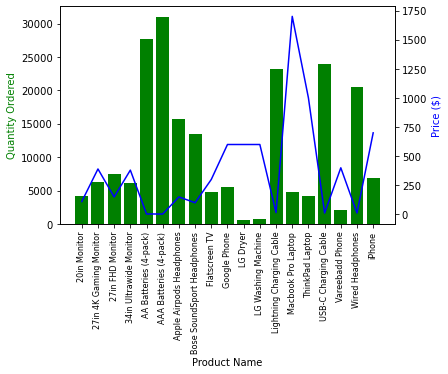

In [8]:
# Sum up the data quantity ordered by product

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product,df in product_group]
prices = all_data.groupby('Product').mean()['Price Each']

figure, a1 = plt.subplots()

a2 = a1.twinx()
a1.bar(products, quantity_ordered, color='g')
a2.plot(products, prices, color='b')

a1.set_xlabel('Product Name')
a1.set_ylabel('Quantity Ordered', color='g')
a2.set_ylabel('Price ($)', color='b')
a1.set_xticklabels(products, rotation='vertical', size=8)

figure.show()

#### Ans: The batteries sold the most because they have lower price as compared to other products